In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import load_model
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.optimizers import Adam

from fully_conv_model_for_lidar import fcn_model
from util_func import *
from train_2 import *

from keras.utils.generic_utils import get_custom_objects
#loss = SSD_Loss(neg_pos_ratio=neg_pos_ratio, alpha=alpha)
get_custom_objects().update({"my_loss": my_loss})

#import keras.losses
#keras.losses.custom_loss = my_loss

Using TensorFlow backend.


In [2]:
import mayavi.mlab

def viz_mayavi_with_labels(points, boxes, view_boxes = True, vals="distance"):
    x = points[:, 0]  # x position of point
    y = points[:, 1]  # y position of point
    z = points[:, 2]  # z position of pointfrom mpl_toolkits.mplot3d import Axes3D
    # r = lidar[:, 3]  # reflectance value of point
    d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor

    # Plot using mayavi -Much faster and smoother than matplotlib
    #import mayavi.mlab
    if vals == "height":
        col = z
    else:
        col = d

    fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 360))
    mayavi.mlab.points3d(x, y, z,
                         col,          # Values used for Color
                         mode="point",
                         colormap='spectral', # 'bone', 'copper', 'gnuplot'
                         # color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                         figure=fig,
                         )
    
    if view_boxes:
        for i in range(len(boxes)):
            car = boxes[i]
            x = car[:,0]
            y = car[:,1]
            z = car[:,2]

            mayavi.mlab.plot3d(x[:4], y[:4], z[:4], tube_radius=0.025)#, colormap='Spectral')
            mayavi.mlab.plot3d(x[[0,3]], y[[0,3]], z[[0,3]], tube_radius=0.025)
            mayavi.mlab.plot3d(x[[0,4]], y[[0,4]], z[[0,4]], tube_radius=0.025)
            mayavi.mlab.plot3d(x[[1,5]], y[[1,5]], z[[1,5]], tube_radius=0.025)
            mayavi.mlab.plot3d(x[[2,6]], y[[2,6]], z[[2,6]], tube_radius=0.025)
            mayavi.mlab.plot3d(x[[3,7]], y[[3,7]], z[[3,7]], tube_radius=0.025)


            mayavi.mlab.plot3d(x[-4:], y[-4:], z[-4:], tube_radius=0.025)#, colormap='Spectral')
            mayavi.mlab.plot3d(x[[4,7]], y[[4,7]], z[[4,7]], tube_radius=0.025)
        
    mayavi.mlab.show()

In [3]:
model = load_model('saved_model/model_May_28_345_32.h5')

[<tf.Tensor 'gradients/split_1_grad/concat:0' shape=(?, 64, 256, 8) dtype=float32>, None, None]


(64, 256, 2)


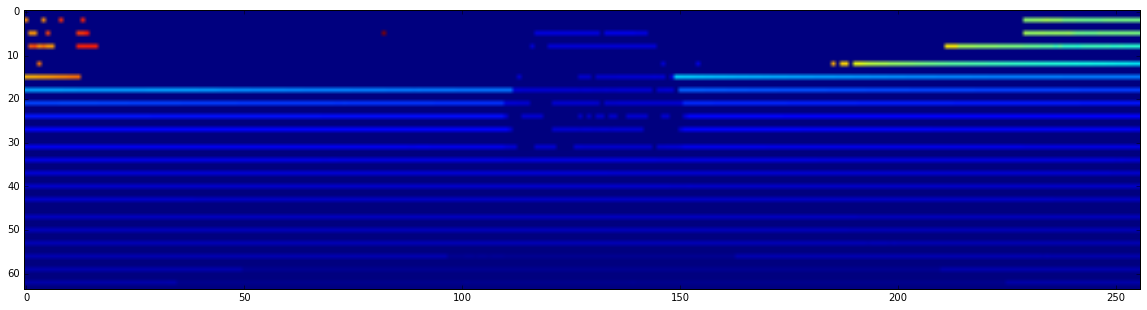

In [4]:
lidar_file = './test_lidar/1/2/lidar_0.npy'
lidar = np.load(lidar_file)
view = cylindrical_projection(lidar)
print(view.shape)
fig, ax = plt.subplots(1,1, figsize = (24,5) )
ax.imshow(view[:,:,0])


In [5]:
viz_mayavi_with_labels(lidar, [], view_boxes = False)

In [6]:
view = view.reshape(1,64,256,2)
pred = model.predict(view)
pred = pred[0]

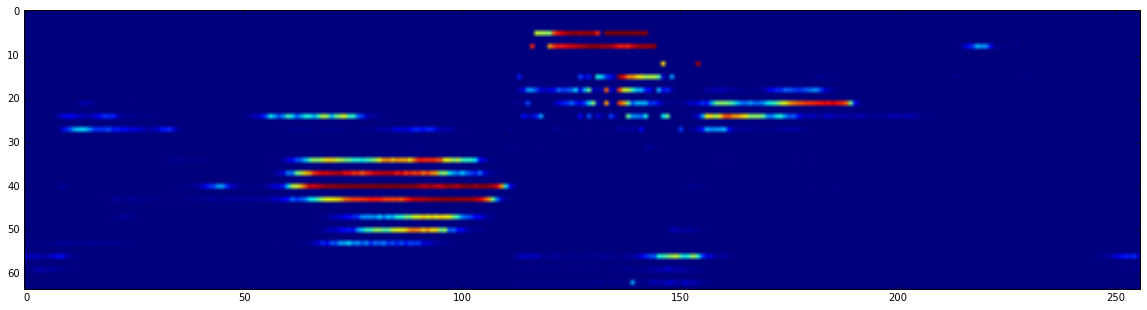

In [7]:
fig, ax = plt.subplots(1,1, figsize = (24,5) )
ax.imshow(pred[:,:,0])

In [13]:
all_boxes, cluster_boxes = predict_boxes(model,lidar, cluster = True,
                                         seg_thres=0.9, cluster_dist = 0.2 min_dist = 2, neigbor_thres = 3)
print(len(all_boxes))
print(len(cluster_boxes))

SyntaxError: invalid syntax (<ipython-input-13-c398d9e04639>, line 2)

In [9]:
n_boxes = len(all_boxes)
print(len(all_boxes))
choosen_boxes = np.random.randint(n_boxes, size = 30)
print(choosen_boxes)
viz_mayavi_with_labels(lidar, all_boxes[choosen_boxes])

111
[ 79  24  52 101  74  16  37  54  19   5   5  12 105 103  71  47  30  71
  38  33  12 104  28  84  89  15  90  19  45  71]


In [10]:
#print(len(cluster_boxes))
viz_mayavi_with_labels(lidar, cluster_boxes)